# 7 章　線形回帰


In [1]:
# 必要ライブラリの宣言
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# waring抑止
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 「ボストン・データセット」はscikit-learnのライブラリでも取得できるが、
# その場合、将来版で利用できなくなる予定のため、別Webサイトから取得する
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
                     skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :],
                   raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                          'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

# データ絞り込み (項目 RMのみ)
x_data = x_org[:, feature_names == 'RM']
print('絞り込み後', x_data.shape)

# ダミー変数を追加
x = np.insert(x_data, 0, 1.0, axis=1)
print('ダミー変数追加後', x.shape)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
絞り込み後 (506, 1)
ダミー変数追加後 (506, 2)


In [3]:
# 入力データxの表示 (ダミー変数を含む)
print(x.shape)
print(x[:5, :])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [4]:
# 正解データ yの表示
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


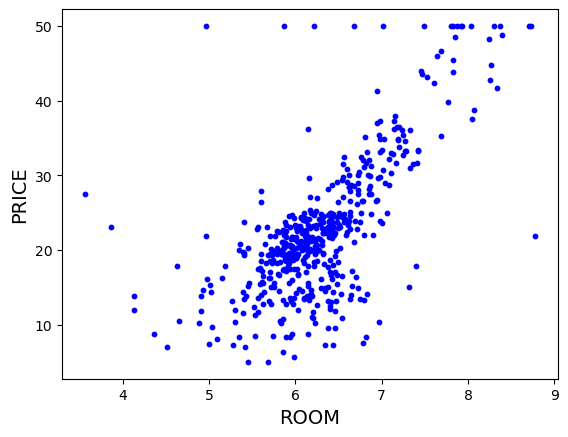

In [5]:
# 散布図の表示
plt.scatter(x[:, 1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

In [6]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return (x @ w)

In [7]:
# 初期化処理

# データ系列総数
M = x.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0, 2))

In [8]:
# 繰り返しループ
for k in range(iters):

    # 予測値の計算 (7.8.1)
    yp = pred(x, w)

    # 誤差の計算 (7.8.2)
    yd = yp - yt

    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M

    # 学習曲線描画用データの計算、保存
    if (k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print("iter = %d  loss = %f" % (k, loss))

iter = 0  loss = 154.224934
iter = 100  loss = 29.617518
iter = 200  loss = 29.431766
iter = 300  loss = 29.250428
iter = 400  loss = 29.073399
iter = 500  loss = 28.900577
iter = 600  loss = 28.731861
iter = 700  loss = 28.567154
iter = 800  loss = 28.406360
iter = 900  loss = 28.249388
iter = 1000  loss = 28.096145
iter = 1100  loss = 27.946544
iter = 1200  loss = 27.800498
iter = 1300  loss = 27.657922
iter = 1400  loss = 27.518733
iter = 1500  loss = 27.382852
iter = 1600  loss = 27.250200
iter = 1700  loss = 27.120700
iter = 1800  loss = 26.994277
iter = 1900  loss = 26.870858
iter = 2000  loss = 26.750372
iter = 2100  loss = 26.632749
iter = 2200  loss = 26.517921
iter = 2300  loss = 26.405821
iter = 2400  loss = 26.296385
iter = 2500  loss = 26.189549
iter = 2600  loss = 26.085252
iter = 2700  loss = 25.983433
iter = 2800  loss = 25.884034
iter = 2900  loss = 25.786997
iter = 3000  loss = 25.692265
iter = 3100  loss = 25.599784
iter = 3200  loss = 25.509501
iter = 3300  loss = 2

In [9]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0, 1])
print('損失関数最終値: %f' % history[-1, 1])

損失関数初期値: 154.224934
損失関数最終値: 21.800325


In [10]:
# 下記直線描画用の座標値計算
xall = x[:, 1].ravel()
xl = np.array([[1, xall.min()], [1, xall.max()]])
yl = pred(xl, w)

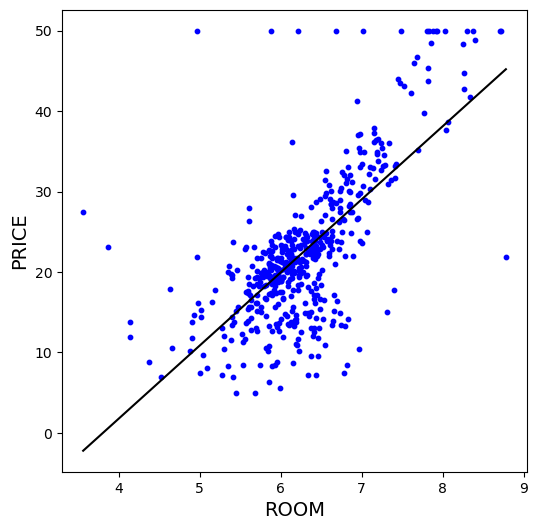

In [11]:
# 散布図と回帰直線の描画
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:, 1], yl, c='k')
plt.show()

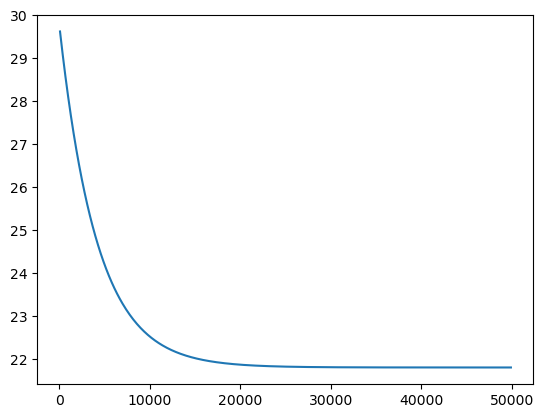

In [12]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:, 0], history[1:, 1])
plt.show()

## 7.10 重回帰モデルへの拡張


In [13]:
# 列(LSTAT: 低所得者率)の追加
x_add = x_org[:, feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print(x2.shape)

(506, 3)


In [14]:
# 入力データxの表示 (ダミーデータを含む)
print(x2[:5, :])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [15]:
# 初期化処理

# データ系列総数
M = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0, 2))

In [16]:
# 繰り返しループ
for k in range(iters):

    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)

    # 誤差の計算 (7.8.2)
    yd = yp - yt

    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M

    # 学習曲線描画用データの計算、保存
    if (k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print("iter = %d  loss = %f" % (k, loss))

iter = 0  loss = 112.063982
iter = 100  loss = 3753823486849577414816920764416.000000
iter = 200  loss = 2655334090092040276818841067698113269617824784724071114866688.000000
iter = 300  loss = 1878297995285389845771871419740313448531353246802527452461280621621659241714209067974524928.000000
iter = 400  loss = 1328647635059331668692558904306561724888841915104038410459042019955538890104261157549667184593344304033650728628016644096.000000
iter = 500  loss = 939842635502855137931208417741903562442060333534601761340713900223202750403536018525616228457994064759925223410283925879115811092237254068846295252992.000000
iter = 600  loss = 664814474659056273351820878980303227262690976798191750532240096580319157447183641991953393881028533021482922213034205854636402401642146375741779865309698337461591618246952597061632.000000
iter = 700  loss = 4702683928354774783838046236803064583463951616774544524514067426151822822962386631059675622560475617767719439677031953547578932960191804117176517010852197334

In [17]:
# 初期化処理 (パラメータを適切な値に変更)

# データ系列総数
M = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
# iters = 50000
iters = 2000

# 学習率
# alpha = 0.01
alpha = 0.001

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0, 2))

In [18]:
# 繰り返しループ
for k in range(iters):

    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)

    # 誤差の計算 (7.8.2)
    yd = yp - yt

    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M

    # 学習曲線描画用データの計算、保存
    if (k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print("iter = %d  loss = %f" % (k, loss))

iter = 0  loss = 112.063982
iter = 100  loss = 25.358934
iter = 200  loss = 16.391055
iter = 300  loss = 15.403015
iter = 400  loss = 15.294135
iter = 500  loss = 15.282114
iter = 600  loss = 15.280764
iter = 700  loss = 15.280589
iter = 800  loss = 15.280544
iter = 900  loss = 15.280514
iter = 1000  loss = 15.280485
iter = 1100  loss = 15.280456
iter = 1200  loss = 15.280428
iter = 1300  loss = 15.280399
iter = 1400  loss = 15.280371
iter = 1500  loss = 15.280342
iter = 1600  loss = 15.280314
iter = 1700  loss = 15.280285
iter = 1800  loss = 15.280257
iter = 1900  loss = 15.280228


In [19]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0, 1])
print('損失関数最終値: %f' % history[-1, 1])

損失関数初期値: 112.063982
損失関数最終値: 15.280228


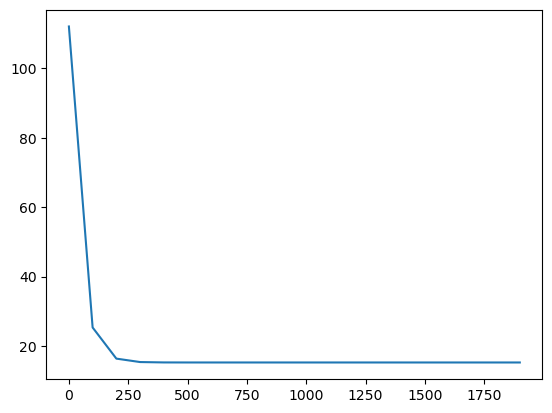

In [20]:
# 学習曲線の表示 (最初の10個分を除く)
plt.plot(history[:, 0], history[:, 1])
plt.show()